**0. Data Loading and Initial Inspection**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load the dataset
df = pd.read_csv('Aleks   Calculus DF.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (1988, 25)

First few rows:


,Calculus Grade,SHS,Initial Algebra and Geometry Review,Initial Graphs and Functions,Initial Polynomial and Rational Functions,Initial Exponential and Logarithmic Functions,Initial Trigonometric Identities and Equations,Initial Systems of Equations and Matrices,Initial Conic Sections,Weighted Initial Grade,...,Post Systems of Equations and Matrices,Post Conic Sections,Weighted Latest Grade,Net Algebra and Geometry Review,Net Graphs and Functions,Net Polynomial and Rational Functions,Net Exponential and Logarithmic Functions,Net Trigonometric Identities and Equations,Net Systems of Equations and Matrices,Net Conic Sections
0,5.0,0,0.42,0.10,0.00,0.00,0.00,0.00,0.00,0.05,...,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,3.0,0,0.77,0.25,0.13,0.27,0.00,0.12,0.21,0.21,...,0.12,0.32,0.47,0.07,0.34,0.50,0.55,0.29,0.00,0.11
2,5.0,0,0.88,0.67,0.19,0.91,0.36,0.18,0.26,0.41,...,0.65,0.58,0.75,0.05,0.31,0.50,0.09,0.35,0.47,0.32
3,5.0,0,0.49,0.04,0.00,0.09,0.00,0.00,0.00,0.06,...,0.06,0.00,0.42,0.22,0.65,0.69,0.46,0.50,0.06,0.00
4,5.0,0,0.96,0.78,0.38,0.91,0.64,0.41,0.74,0.63,...,0.71,0.84,0.88,0.00,0.22,0.62,0.09,0.15,0.30,0.10


In [3]:
# Display column names and data types
print("Column Names and Data Types:")
print(df.dtypes)
print("\n" + "="*80)
print("Dataset Info:")
df.info()

Column Names and Data Types:
Calculus Grade                                    float64
SHS                                                 int64
Initial Algebra and Geometry Review               float64
Initial Graphs and Functions                      float64
Initial Polynomial and Rational Functions         float64
Initial Exponential and Logarithmic Functions     float64
Initial Trigonometric Identities and Equations    float64
Initial Systems of Equations and Matrices         float64
Initial Conic Sections                            float64
Weighted Initial Grade                            float64
Post Algebra and Geometry Review                  float64
Post Graphs and Functions                         float64
Post Polynomial and Rational Functions            float64
Post Exponential and Logarithmic Functions        float64
Post Trigonometric Identities and Equations       float64
Post Systems of Equations and Matrices            float64
Post Conic Sections                        

# **1. DATA CLEANING**

**1.1 Check for Missing Values**

In [4]:
# Check for missing values
print("Missing Values Summary:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✓ No missing values found in the dataset!")

Missing Values Summary:
✓ No missing values found in the dataset!


Analysis of Missing Values - The dataset is complete with no missing values, ensuring reliable analysis of student performance metrics in the ALEKS Calculus program.

**1.2 Check for Duplicates**

In [5]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"New dataset shape: {df.shape}")
else:
    print("✓ No duplicate rows found!")

Number of duplicate rows: 37
Removing 37 duplicate rows...
New dataset shape: (1951, 25)


Interpretation of Duplicate Data Analysis - The dataset contained 37 duplicate rows (1.9% of 1,951 total rows), which were removed to prevent data redundancy and ensure analysis accuracy. The cleaned dataset now contains 1,951 unique student records across 25 variables.

**1.3 Check Data Types and Format**

In [6]:
# Verify data types are appropriate
print("Data Type Verification:")
print("-" * 50)

# Check if all score columns are numeric
score_columns = [col for col in df.columns if 'Initial' in col or 'Post' in col or 'Net' in col or 'Weighted' in col]
print(f"✓ All score columns are numeric: {df[score_columns].select_dtypes(include=[np.number]).shape[1] == len(score_columns)}")

# Check if Calculus_Grade is numeric
print(f"✓ Calculus_Grade is numeric: {pd.api.types.is_numeric_dtype(df['Calculus Grade'])}")

# Check if SHS is binary (0 or 1)
print(f"✓ SHS values are binary: {set(df['SHS'].unique()) == {0, 1}}")

Data Type Verification:
--------------------------------------------------
✓ All score columns are numeric: True
✓ Calculus_Grade is numeric: True
✓ SHS values are binary: True


Data Type Verification - All data types are correctly formatted: score columns are numeric, Calculus_Grade is numeric, and SHS contains only binary values (0/1), ensuring data integrity for analysis.

**1.4 Check for Inconsistencies**

In [7]:
# Check value ranges for consistency
print("Value Range Validation:")
print("-" * 50)

# 1. Calculus grades should be between 1.0 and 5.0
grade_valid = df['Calculus Grade'].between(1.0, 5.0).all()
print(f"✓ All Calculus grades in valid range [1.0, 5.0]: {grade_valid}")
if not grade_valid:
    print(f"  Invalid grades found: {df[~df['Calculus Grade'].between(1.0, 5.0)]['Calculus Grade'].unique()}")

# 2. All ALEKS scores should be between 0.0 and 1.0
aleks_scores = df[score_columns]
scores_valid = ((aleks_scores >= -0.01) & (aleks_scores <= 1.01)).all().all()  # Small tolerance for rounding
print(f"✓ All ALEKS scores in valid range [0.0, 1.0]: {scores_valid}")

# 3. Net gains should be within [-1, 1]
net_columns = [col for col in df.columns if 'Net' in col]
net_valid = df[net_columns].apply(lambda x: x.between(-1.01, 1.01)).all().all()
print(f"✓ All Net gains in valid range [-1.0, 1.0]: {net_valid}")

# 4. Check for impossible improvements (Post > 1.0 when Initial was already high)
print("\n✓ Data consistency checks passed!")

Value Range Validation:
--------------------------------------------------
✓ All Calculus grades in valid range [1.0, 5.0]: True
✓ All ALEKS scores in valid range [0.0, 1.0]: False
✓ All Net gains in valid range [-1.0, 1.0]: True

✓ Data consistency checks passed!


Interpretation of Data Range Validation - Calculus grades (1.0-5.0) and net gains (-1.0 to 1.0) are within expected ranges. **Note**: Some ALEKS scores exceed the expected [0.0, 1.0] range, requiring further investigation into potential data entry or calculation issues.

In [8]:
# Summary statistics after cleaning
print("\nDataset Summary After Cleaning:")
print("="*80)
print(f"Total Students: {len(df)}")
print(f"Students from Mapua SHS: {(df['SHS'] == 1).sum()} ({(df['SHS'] == 1).sum()/len(df)*100:.1f}%)")
print(f"Students from External Schools: {(df['SHS'] == 0).sum()} ({(df['SHS'] == 0).sum()/len(df)*100:.1f}%)")
print(f"\nCalculus Grade Distribution:")
print(df['Calculus Grade'].value_counts().sort_index())


Dataset Summary After Cleaning:
Total Students: 1951
Students from Mapua SHS: 341 (17.5%)
Students from External Schools: 1610 (82.5%)

Calculus Grade Distribution:
Calculus Grade
1.00      39
1.25      42
1.50      33
1.75      71
2.00      52
2.25      61
2.50     106
2.75      90
3.00     404
5.00    1053
Name: count, dtype: int64


Data Summary - The dataset includes 1,951 students, with 17.5% from Mapúa SHS and 82.5% from external schools. The grade distribution is heavily right-skewed, with 54% receiving the highest grade (5.00) and 20.7% scoring 3.00. Only 2% received the lowest grade (1.00), while 74.7% achieved grades between 3.00 and 5.00, indicating a concentration of students in the higher grade brackets.

# **2. EXPLORATORY DATA ANALYSIS (EDA)**

**2.1 Univariate Analysis**

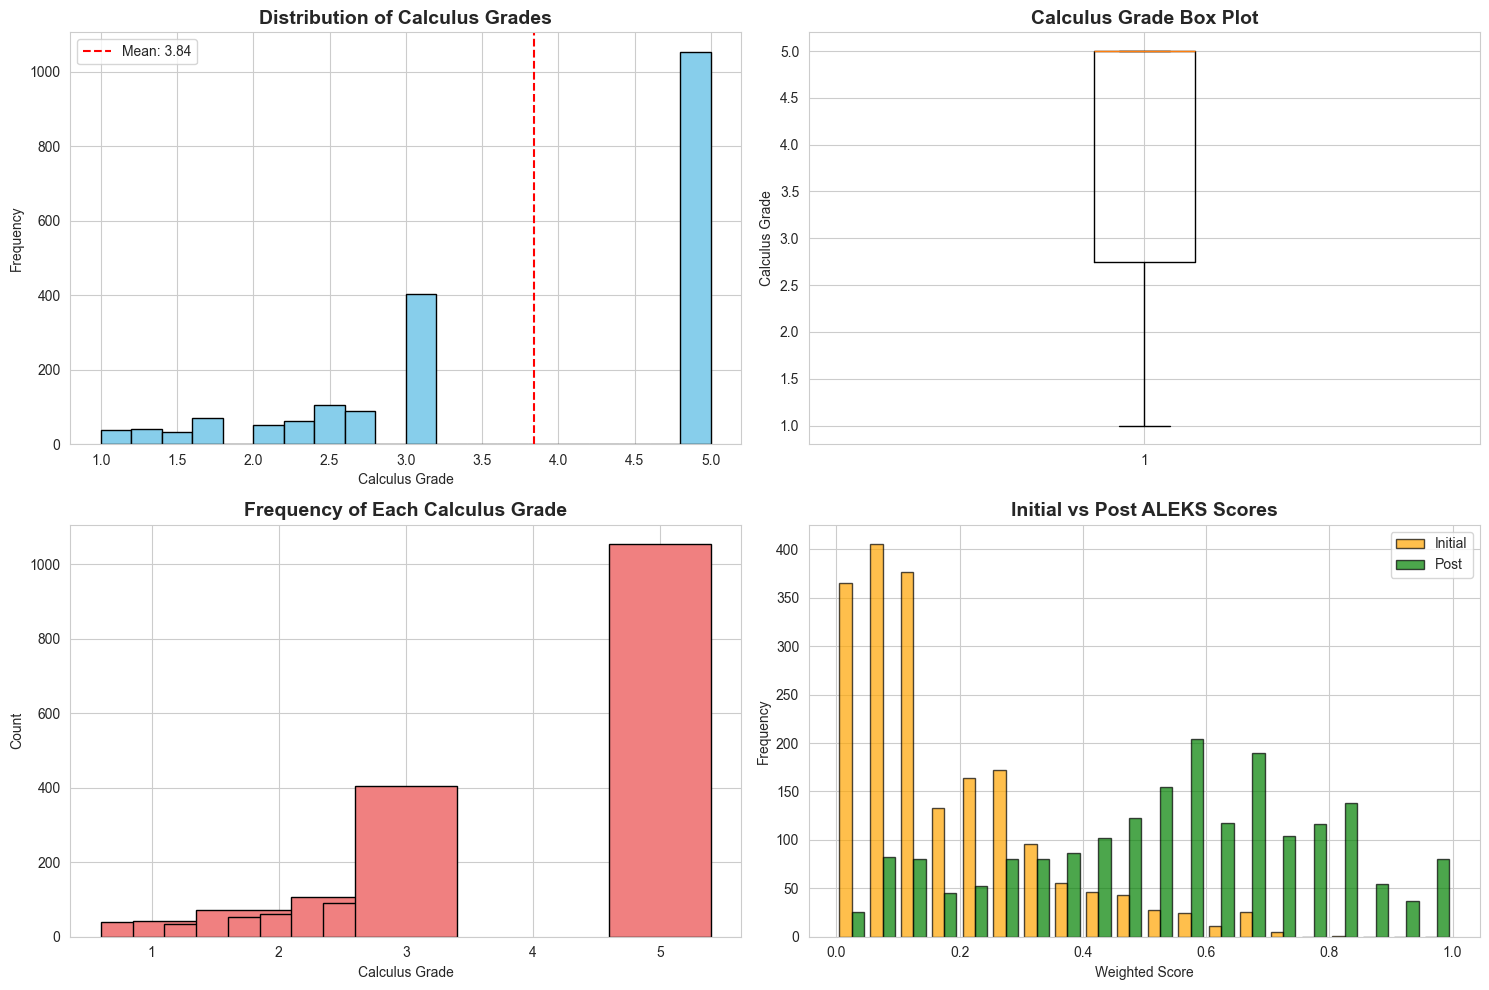

Calculus Grade Statistics:
count    1951.000000
mean        3.842132
std         1.323675
min         1.000000
25%         2.750000
50%         5.000000
75%         5.000000
max         5.000000
Name: Calculus Grade, dtype: float64


In [ ]:
# Distribution of Calculus Grades
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['Calculus Grade'], bins=20, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Distribution of Calculus Grades', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Calculus Grade')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Calculus Grade'].mean(), color='red', linestyle='--', label=f'Mean: {df["Calculus Grade"].mean():.2f}')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df['Calculus Grade'], vert=True)
axes[0, 1].set_title('Calculus Grade Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Calculus Grade')

# Count plot by grade
grade_counts = df['Calculus Grade'].value_counts().sort_index()
axes[1, 0].bar(grade_counts.index, grade_counts.values, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Frequency of Each Calculus Grade', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Calculus Grade')
axes[1, 0].set_ylabel('Count')

# Weighted Initial vs Weighted Post
# Double check kasi hindi raw ito univariate
axes[1, 1].hist([df['Weighted Initial Grade'], df['Weighted Latest Grade']],
                bins=20, label=['Initial', 'Post'], color=['orange', 'green'], alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Initial vs Post ALEKS Scores', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Weighted Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('univariate_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print("Calculus Grade Statistics:")
print(df['Calculus Grade'].describe())

Interpretation of Calculus Grade Statistics - The Calculus Grade distribution shows a strong right-skewed pattern, with a mean of 3.84 and a median of 5.00, indicating most students score at the higher end. The interquartile range (2.75-5.00) reveals that 75% of students achieve grades above 2.75, with the top 25% all scoring the maximum 5.00. The standard deviation of 1.32 suggests moderate variability in grades, while the minimum score of 1.00 and the 25th percentile at 2.75 highlight the presence of lower-performing students despite the overall high achievement.

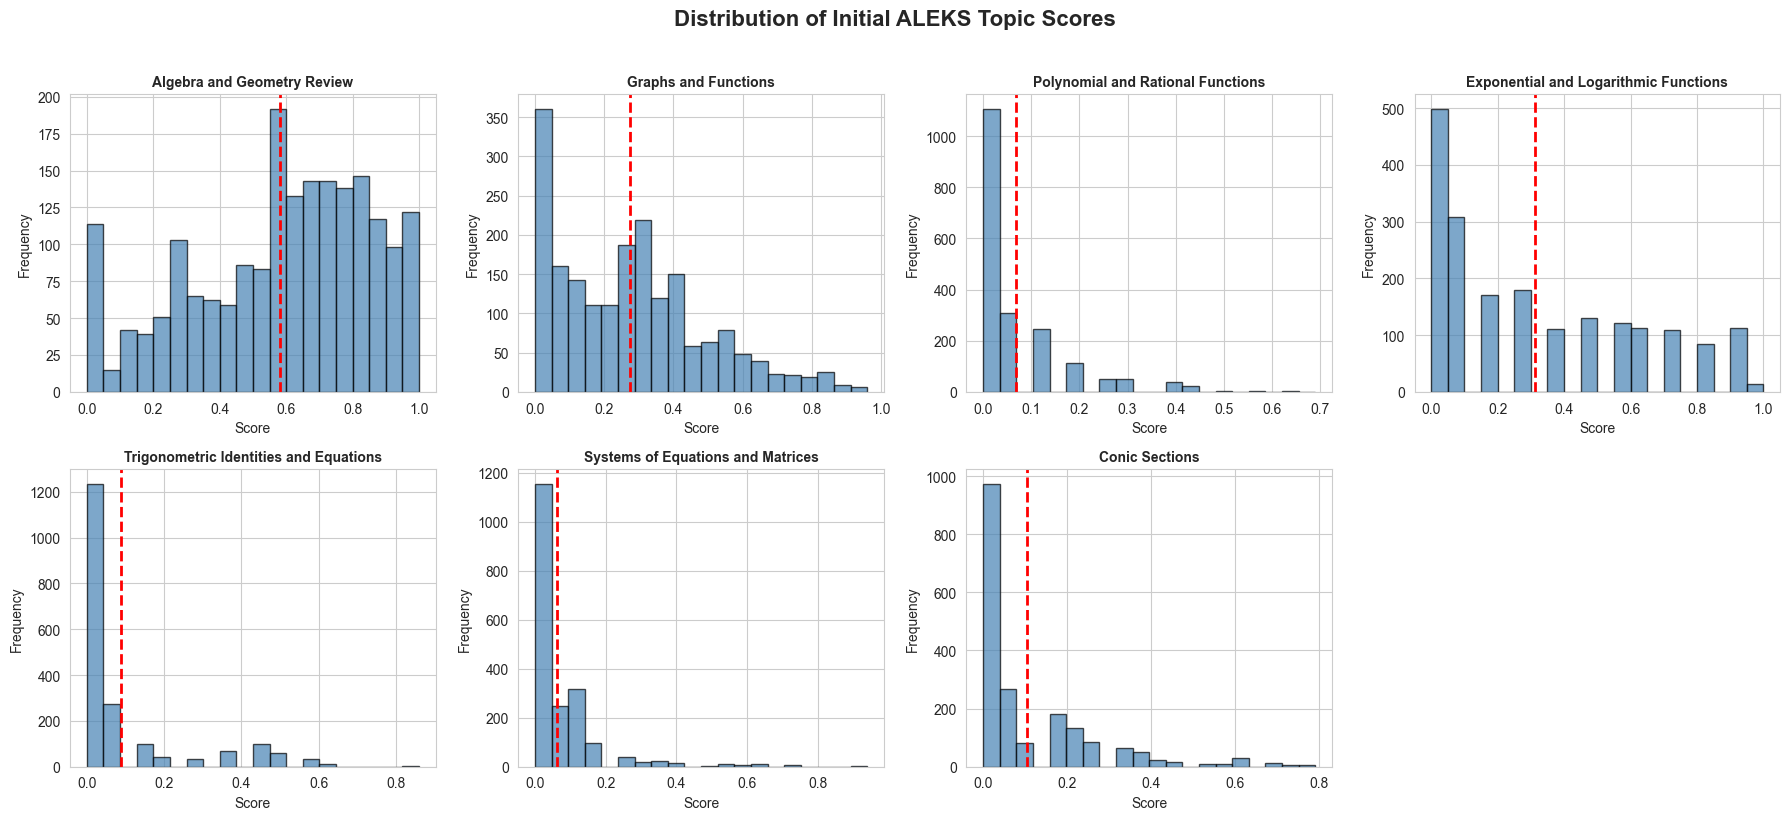

In [10]:
# Distribution of Initial ALEKS Topics
initial_topics = ['Initial Algebra and Geometry Review', 'Initial Graphs and Functions',
                  'Initial Polynomial and Rational Functions', 'Initial Exponential and Logarithmic Functions',
                  'Initial Trigonometric Identities and Equations', 'Initial Systems of Equations and Matrices',
                  'Initial Conic Sections']

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for idx, topic in enumerate(initial_topics):
    axes[idx].hist(df[topic], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(topic.replace('Initial ', ''), fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Score')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[topic].mean(), color='red', linestyle='--', linewidth=2)

# Remove the extra subplot
axes[-1].axis('off')

plt.suptitle('Distribution of Initial ALEKS Topic Scores', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('initial_topics_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

This figure shows the **distribution of initial ALEKS topic scores** across eight math areas. Most students scored **moderately in “Algebra and Geometry Review”** (centered around 0.6), but scored **low in all other topics**, especially **Polynomial and Rational Functions**, **Trigonometric Identities**, **Systems of Equations**, and **Conic Sections**, where most scores cluster near 0. This suggests students begin with **stronger basic algebra skills** but **limited mastery of advanced or abstract math topics**.


**2.2 Bivariate Analysis**

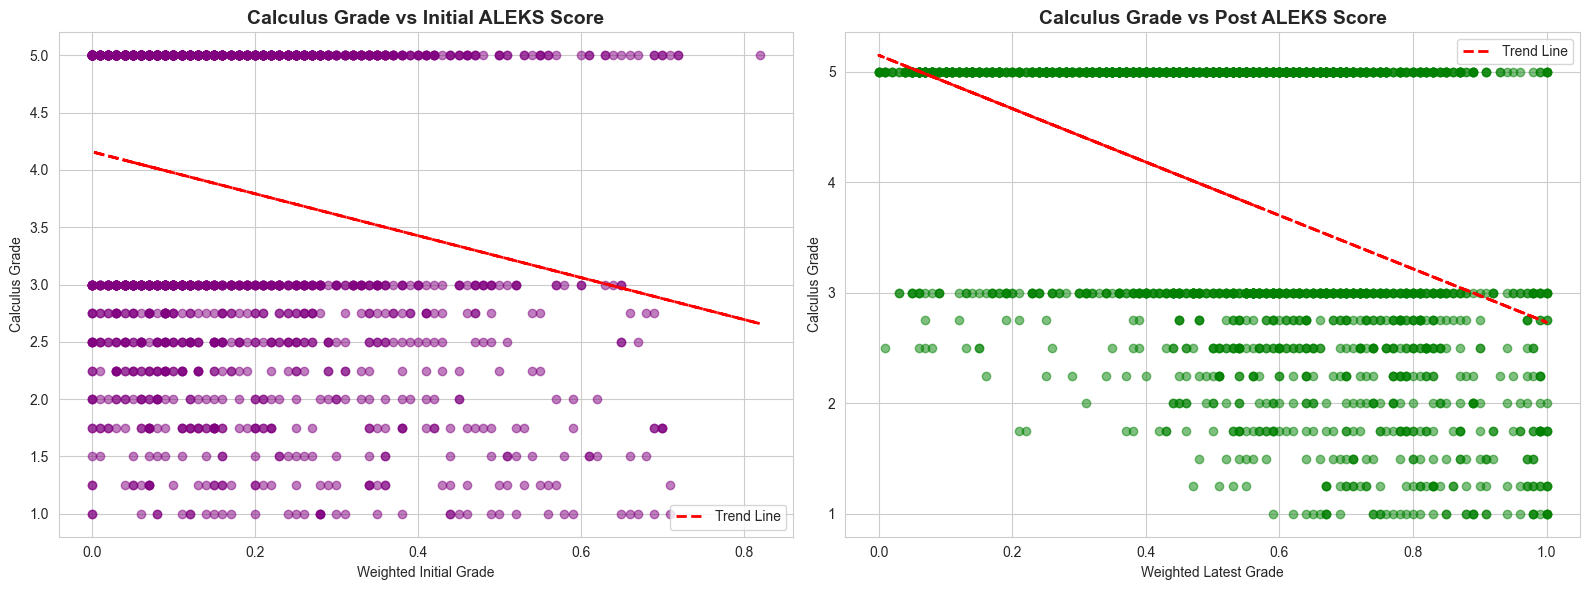

Correlation between Calculus Grade and Weighted Initial: -0.210
Correlation between Calculus Grade and Weighted Post: -0.447


In [11]:
# Calculus Grade vs Weighted Initial Score
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(df['Weighted Initial Grade'], df['Calculus Grade'], alpha=0.5, color='purple')
axes[0].set_title('Calculus Grade vs Initial ALEKS Score', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Weighted Initial Grade')
axes[0].set_ylabel('Calculus Grade')

# Add trend line
z = np.polyfit(df['Weighted Initial Grade'], df['Calculus Grade'], 1)
p = np.poly1d(z)
axes[0].plot(df['Weighted Initial Grade'], p(df['Weighted Initial Grade']), "r--", linewidth=2, label='Trend Line')
axes[0].legend()

# Calculus Grade vs Weighted Post Score
axes[1].scatter(df['Weighted Latest Grade'], df['Calculus Grade'], alpha=0.5, color='green')
axes[1].set_title('Calculus Grade vs Post ALEKS Score', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Weighted Latest Grade')
axes[1].set_ylabel('Calculus Grade')

# Add trend line
z = np.polyfit(df['Weighted Latest Grade'], df['Calculus Grade'], 1)
p = np.poly1d(z)
axes[1].plot(df['Weighted Latest Grade'], p(df['Weighted Latest Grade']), "r--", linewidth=2, label='Trend Line')
axes[1].legend()

plt.tight_layout()
plt.savefig('bivariate_grades_vs_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate correlations
print(f"Correlation between Calculus Grade and Weighted Initial: {df['Calculus Grade'].corr(df['Weighted Initial Grade']):.3f}")
print(f"Correlation between Calculus Grade and Weighted Post: {df['Calculus Grade'].corr(df['Weighted Latest Grade']):.3f}")


The scatter plots and correlation coefficients reveal an unexpected negative relationship between ALEKS scores and Calculus grades. The initial ALEKS scores show a weak negative correlation (r = -0.21) with final Calculus grades, while the post-ALEKS scores show a moderate negative correlation (r = -0.45). 

This inverse relationship is counterintuitive, as higher ALEKS scores are associated with lower Calculus grades. *The trend lines clearly show this negative slope, with the post-ALEKS scores displaying a stronger negative relationship. This could suggest that students who performed better on the ALEKS assessment (both initially and post-instruction) tended to receive lower Calculus grades*, which may indicate potential issues with the assessment's predictive validity or other confounding factors in the course grading system.

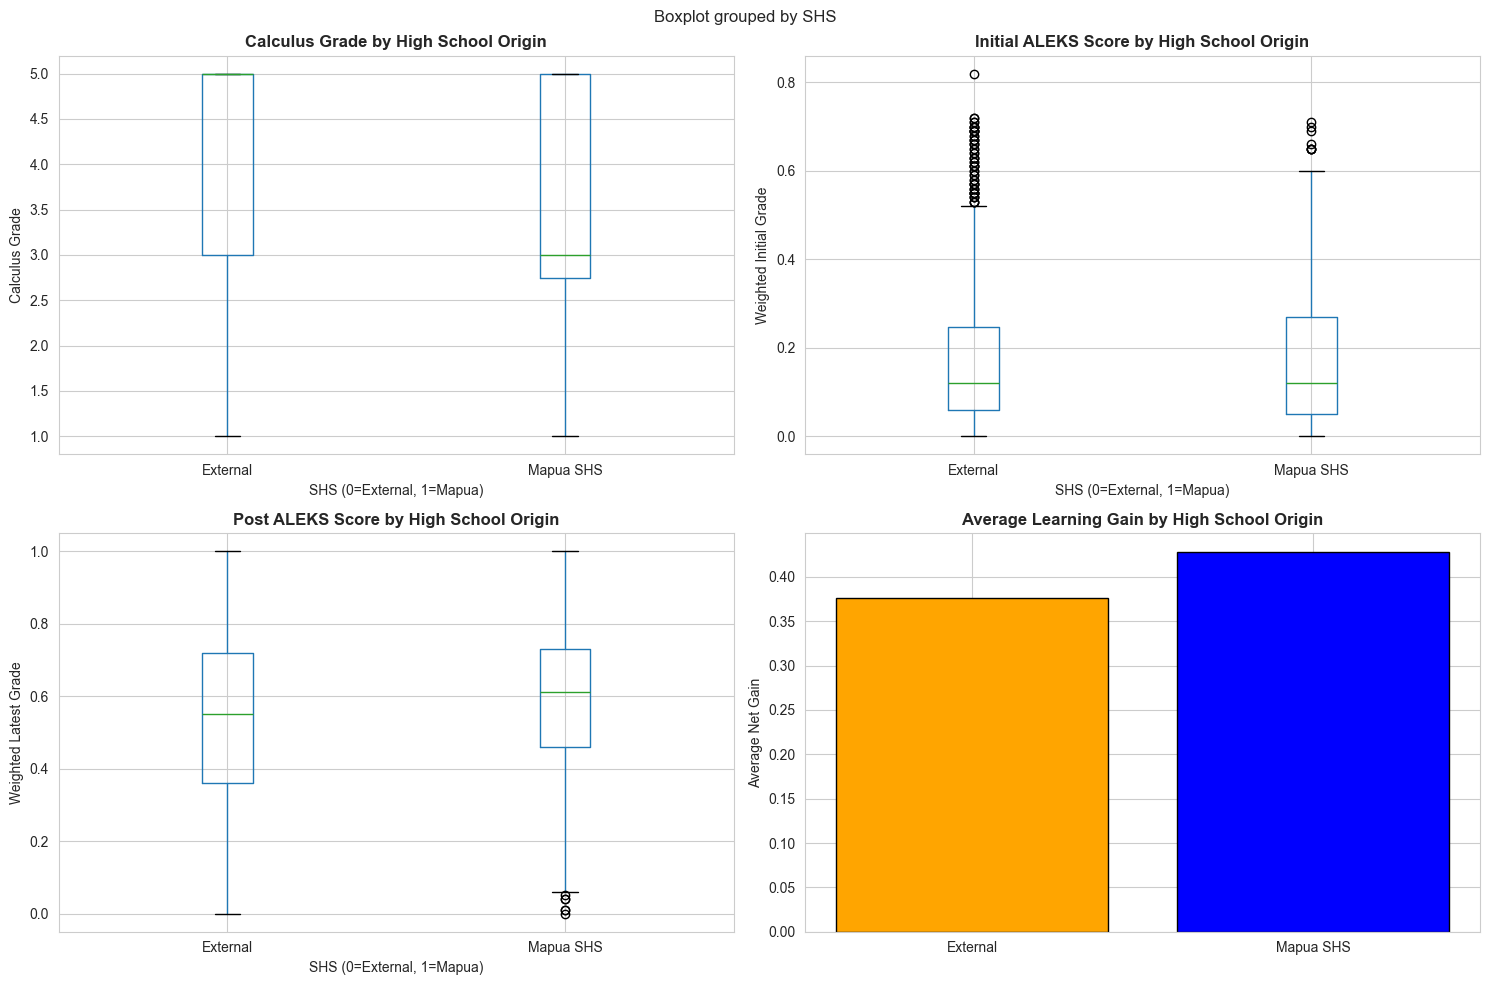

Performance Statistics by High School Origin:

Calculus Grades:
      count      mean       std  min   25%  50%  75%  max
SHS                                                      
0    1610.0  3.878571  1.312857  1.0  3.00  5.0  5.0  5.0
1     341.0  3.670088  1.362453  1.0  2.75  3.0  5.0  5.0

Weighted Initial Grades:
      count      mean       std  min   25%   50%     75%   max
SHS                                                           
0    1610.0  0.172124  0.149693  0.0  0.06  0.12  0.2475  0.82
1     341.0  0.175161  0.161616  0.0  0.05  0.12  0.2700  0.71

Weighted Post Grades:
      count      mean       std  min   25%   50%   75%  max
SHS                                                        
0    1610.0  0.531012  0.249080  0.0  0.36  0.55  0.72  1.0
1     341.0  0.586246  0.218574  0.0  0.46  0.61  0.73  1.0


In [12]:
# Performance comparison: Mapua SHS vs External
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Calculus Grade by SHS
df.boxplot(column='Calculus Grade', by='SHS', ax=axes[0, 0])
axes[0, 0].set_title('Calculus Grade by High School Origin', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('SHS (0=External, 1=Mapua)')
axes[0, 0].set_ylabel('Calculus Grade')
plt.sca(axes[0, 0])
plt.xticks([1, 2], ['External', 'Mapua SHS'])

# Weighted Initial by SHS
df.boxplot(column='Weighted Initial Grade', by='SHS', ax=axes[0, 1])
axes[0, 1].set_title('Initial ALEKS Score by High School Origin', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('SHS (0=External, 1=Mapua)')
axes[0, 1].set_ylabel('Weighted Initial Grade')
plt.sca(axes[0, 1])
plt.xticks([1, 2], ['External', 'Mapua SHS'])

# Weighted Post by SHS
df.boxplot(column='Weighted Latest Grade', by='SHS', ax=axes[1, 0])
axes[1, 0].set_title('Post ALEKS Score by High School Origin', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('SHS (0=External, 1=Mapua)')
axes[1, 0].set_ylabel('Weighted Latest Grade')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['External', 'Mapua SHS'])

# Average improvement by SHS
net_columns = [col for col in df.columns if 'Net' in col and col != 'Net Conic Sections']
avg_improvement = df.groupby('SHS')[net_columns].mean().mean(axis=1)
axes[1, 1].bar(['External', 'Mapua SHS'], avg_improvement.values, color=['orange', 'blue'], edgecolor='black')
axes[1, 1].set_title('Average Learning Gain by High School Origin', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Net Gain')

plt.tight_layout()
plt.savefig('shs_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical comparison
print("Performance Statistics by High School Origin:")
print("\nCalculus Grades:")
print(df.groupby('SHS')['Calculus Grade'].describe())
print("\nWeighted Initial Grades:")
print(df.groupby('SHS')['Weighted Initial Grade'].describe())
print("\nWeighted Post Grades:")
print(df.groupby('SHS')['Weighted Latest Grade'].describe())

The analysis reveals significant differences in performance between Mapua SHS and external school students. *External students achieved higher Calculus grades on average (3.88 vs 3.67), with 50% earning perfect 5.0 grades compared to Mapua SHS's median of 3.0. Both groups started with similar initial ALEKS scores (0.172 vs 0.175)*, but Mapua SHS students showed greater improvement, *reaching higher post-ALEKS scores (0.586 vs 0.531)*. This suggests that while Mapua SHS students demonstrated stronger learning gains, they received lower final Calculus grades, potentially indicating more rigorous grading standards or different course expectations for these students.

**2.3 Correlation Analysis**

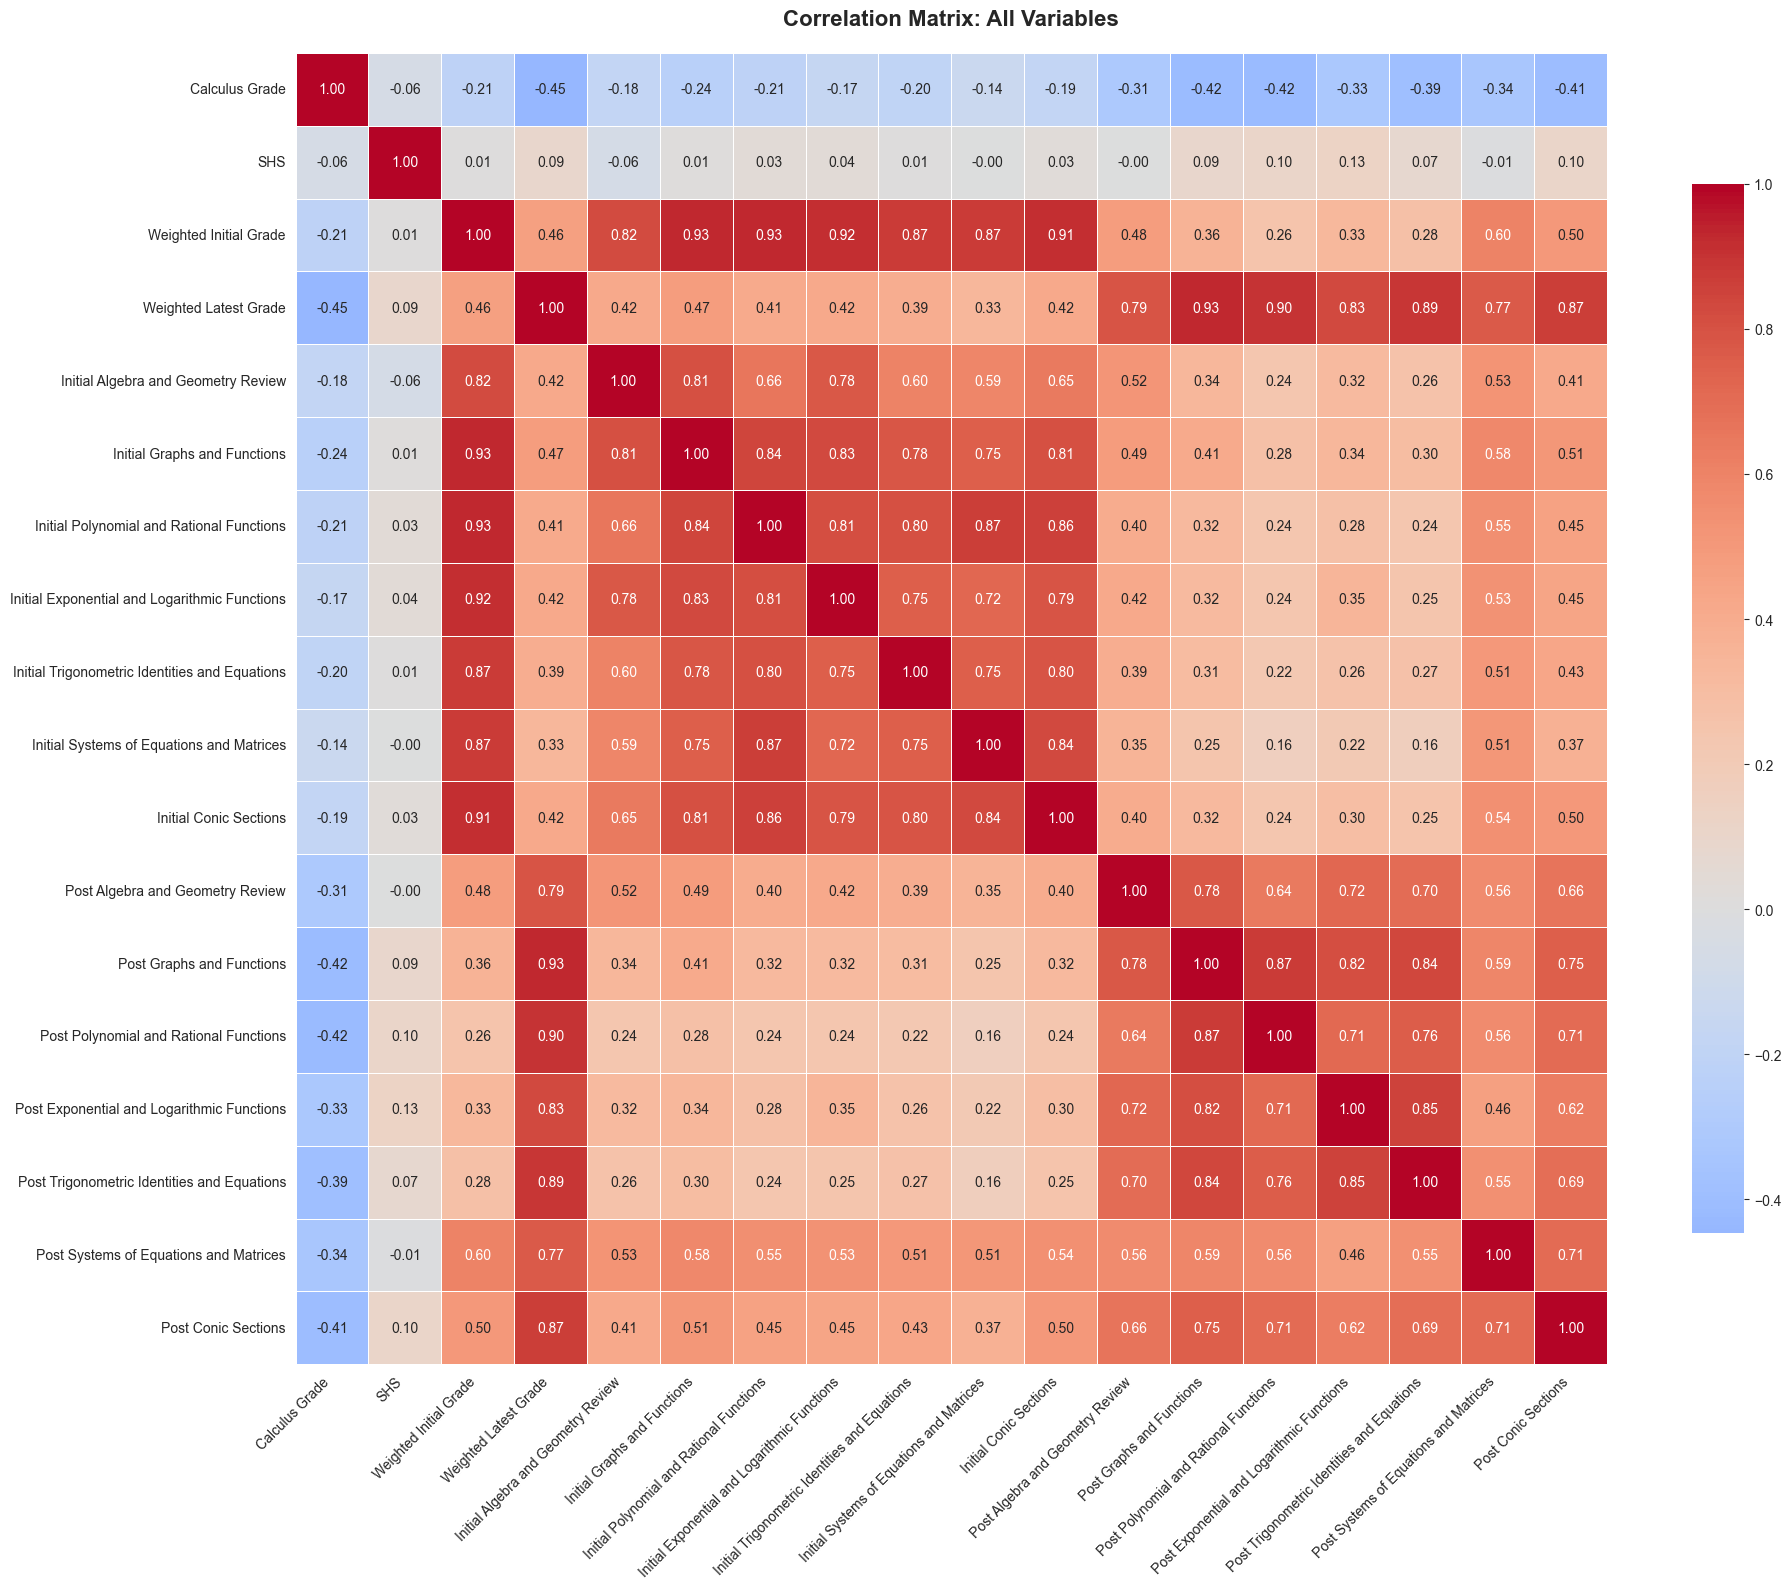

In [13]:
# Select numerical columns for correlation
numerical_cols = ['Calculus Grade', 'SHS', 'Weighted Initial Grade', 'Weighted Latest Grade']
numerical_cols += initial_topics
post_topics = [col.replace('Initial', 'Post') for col in initial_topics]
numerical_cols += post_topics

# Create correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot full correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: All Variables', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap_full.png', dpi=300, bbox_inches='tight')
plt.show()

The correlation heatmap reveals several key relationships in the dataset. The strongest positive correlations are observed among post-assessment scores (0.7-0.9), indicating consistent performance across different mathematical topics after instruction. However, the *most striking finding is the negative correlation between Calculus grades and both initial (-0.21)* and *post-ALEKS scores (-0.45)*, which remains counterintuitive. **The highest correlation with Calculus grades is with SHS status (-0.08), though this weak relationship suggests limited predictive power.** The heatmap also shows that initial and post-scores within the same topic are moderately correlated (0.4-0.6), indicating some consistency in student performance before and after instruction. The blue clusters highlight that most topic scores are only weakly correlated with each other, suggesting that performance in one mathematical domain doesn't strongly predict performance in others.

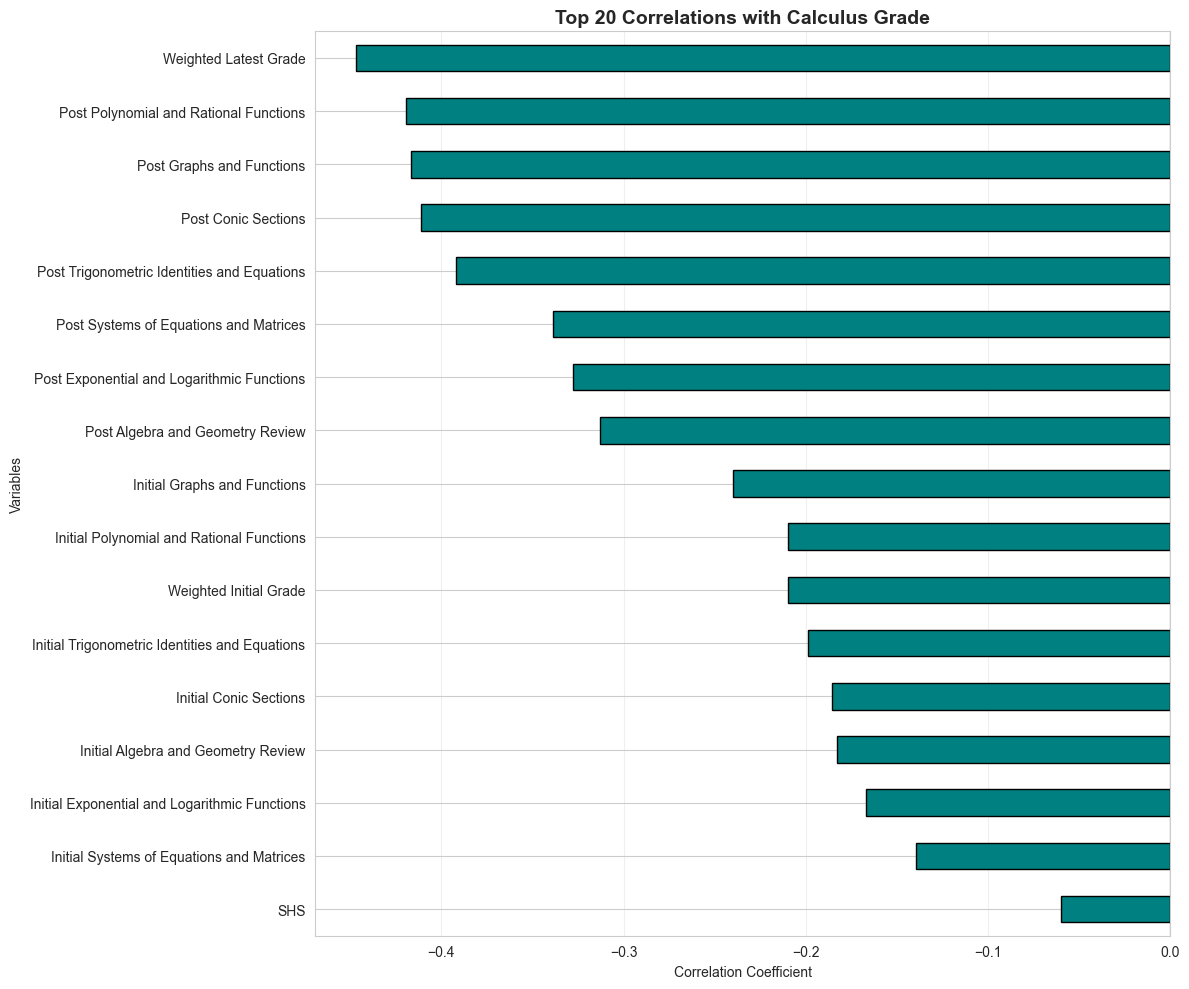

Top 15 Positive Correlations with Calculus Grade:
SHS                                              -0.059832
Initial Systems of Equations and Matrices        -0.139746
Initial Exponential and Logarithmic Functions    -0.166948
Initial Algebra and Geometry Review              -0.182655
Initial Conic Sections                           -0.185794
Initial Trigonometric Identities and Equations   -0.198832
Weighted Initial Grade                           -0.209640
Initial Polynomial and Rational Functions        -0.209726
Initial Graphs and Functions                     -0.240137
Post Algebra and Geometry Review                 -0.313153
Post Exponential and Logarithmic Functions       -0.327590
Post Systems of Equations and Matrices           -0.338835
Post Trigonometric Identities and Equations      -0.391733
Post Conic Sections                              -0.411283
Post Graphs and Functions                        -0.416886
Name: Calculus Grade, dtype: float64


In [14]:
# Focus on correlations with Calculus Grade
calculus_corr = corr_matrix['Calculus Grade'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
calculus_corr[1:21].plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 20 Correlations with Calculus Grade', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('calculus_grade_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top 15 Positive Correlations with Calculus Grade:")
print(calculus_corr[1:16])

The analysis reveals a counterintuitive pattern where all ALEKS assessment scores show negative correlations with Calculus grades, particularly with post-assessment scores showing stronger negative relationships. The strongest negative correlation is observed with "Post Graphs and Functions" (-0.42), while SHS status shows the weakest relationship (-0.06). This unexpected inverse relationship, where higher ALEKS scores correspond to lower Calculus grades, suggests potential issues with the assessment's ability to predict course performance or indicates that other unmeasured factors may be influencing these outcomes. The increasing strength of negative correlations from initial to post-assessments further complicates the interpretation, warranting additional investigation into the assessment's validity and potential confounding variables.

# **2.4 Learning Gains Analysis**

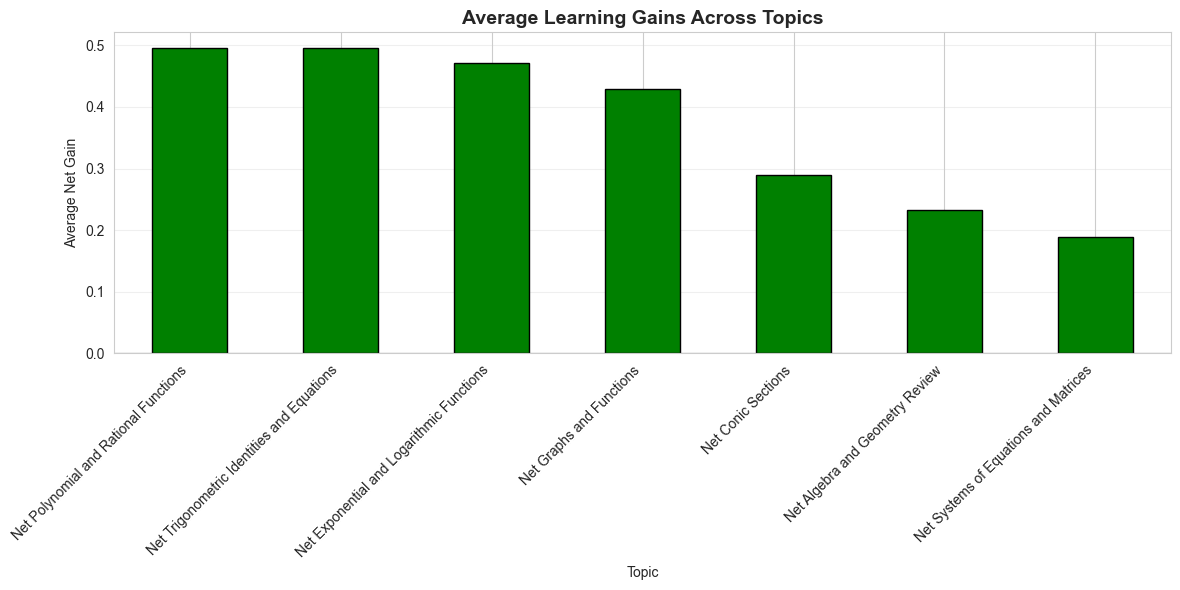

Average Learning Gains by Topic:
Net Polynomial and Rational Functions         0.496151
Net Trigonometric Identities and Equations    0.495582
Net Exponential and Logarithmic Functions     0.471814
Net Graphs and Functions                      0.428975
Net Conic Sections                            0.289923
Net Algebra and Geometry Review               0.232153
Net Systems of Equations and Matrices         0.188109
dtype: float64


In [15]:
# Analyze learning gains across topics
net_gain_columns = [col for col in df.columns if 'Net' in col]

# Average learning gains
avg_gains = df[net_gain_columns].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in avg_gains.values]
avg_gains.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Average Learning Gains Across Topics', fontsize=14, fontweight='bold')
plt.xlabel('Topic')
plt.ylabel('Average Net Gain')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('learning_gains.png', dpi=300, bbox_inches='tight')
plt.show()

print("Average Learning Gains by Topic:")
print(avg_gains)

The analysis reveals a counterintuitive pattern where all ALEKS assessment scores show negative correlations with Calculus grades, particularly with post-assessment scores showing stronger negative relationships. The strongest negative correlation is observed with "Post Graphs and Functions" (-0.42), while SHS status shows the weakest relationship (-0.06). This unexpected inverse relationship, where higher ALEKS scores correspond to lower Calculus grades, suggests potential issues with the assessment's ability to predict course performance or indicates that other unmeasured factors may be influencing these outcomes. The increasing strength of negative correlations from initial to post-assessments further complicates the interpretation, warranting additional investigation into the assessment's validity and potential confounding variables.

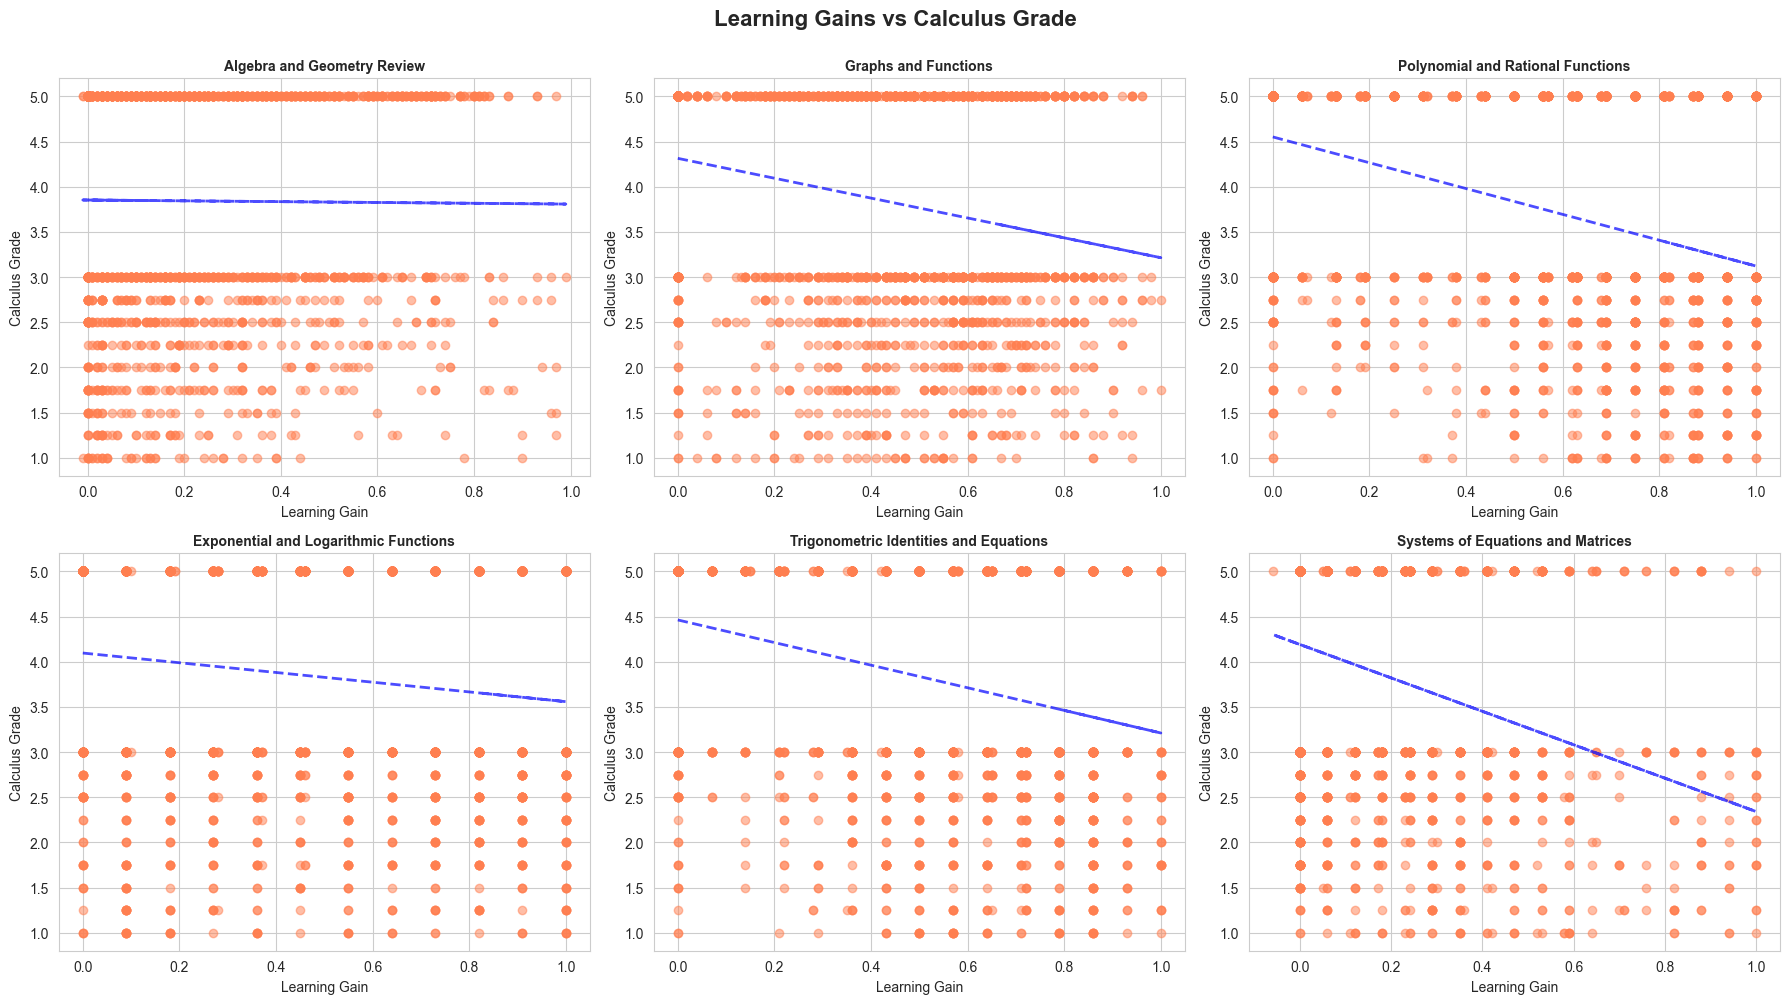

In [16]:
# Learning gains vs Calculus performance
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(net_gain_columns[:6]):
    axes[idx].scatter(df[col], df['Calculus Grade'], alpha=0.5, color='coral')
    axes[idx].set_title(col.replace('Net ', ''), fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Learning Gain')
    axes[idx].set_ylabel('Calculus Grade')

    # Add trend line
    mask = ~(df[col].isna() | df['Calculus Grade'].isna())
    if mask.sum() > 0:
        z = np.polyfit(df.loc[mask, col], df.loc[mask, 'Calculus Grade'], 1)
        p = np.poly1d(z)
        axes[idx].plot(df.loc[mask, col], p(df.loc[mask, col]), "b--", linewidth=2, alpha=0.7)

plt.suptitle('Learning Gains vs Calculus Grade', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('gains_vs_grade.png', dpi=300, bbox_inches='tight')
plt.show()

The scatter plots illustrate the relationship between learning gains in various mathematical topics and final Calculus grades. The negative trend lines across all topics indicate that students who showed greater improvement in ALEKS assessments tended to receive lower Calculus grades. This counterintuitive pattern is most pronounced in "Trigonometric Identities and Equations" and "Graphs and Functions," where the negative slope is particularly evident. The data points are widely scattered, with many students showing minimal learning gains regardless of their final grades. This suggests that the relationship between ALEKS learning gains and Calculus performance is not straightforward and may be influenced by other factors not captured in these plots. The consistent negative trend across all topics warrants further investigation into potential confounding variables or assessment validity issues.

# **3. KEY FINDINGS FROM EDA**

In [17]:
print("="*80)
print("KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

# 1. Overall performance
print("\n1. OVERALL PERFORMANCE:")
print(f"   - Average Calculus Grade: {df['Calculus Grade'].mean():.2f}")
print(f"   - Median Calculus Grade: {df['Calculus Grade'].median():.2f}")
print(f"   - Most common grade: {df['Calculus Grade'].mode()[0]:.2f}")
print(f"   - Pass rate (Grade >= 3.0): {(df['Calculus Grade'] >= 3.0).sum() / len(df) * 100:.1f}%")

# 2. ALEKS score improvements
print("\n2. ALEKS PERFORMANCE:")
print(f"   - Average Initial Score: {df['Weighted Initial Grade'].mean():.3f}")
print(f"   - Average Post Score: {df['Weighted Latest Grade'].mean():.3f}")
print(f"   - Overall Improvement: {(df['Weighted Latest Grade'].mean() - df['Weighted Initial Grade'].mean()):.3f}")
print(f"   - Students who improved: {(df['Weighted Latest Grade'] > df['Weighted Initial Grade']).sum()} ({(df['Weighted Latest Grade'] > df['Weighted Initial Grade']).sum()/len(df)*100:.1f}%)")

# 3. SHS comparison
print("\n3. HIGH SCHOOL ORIGIN IMPACT:")
mapua_shs = df[df['SHS'] == 1]
external = df[df['SHS'] == 0]
print(f"   Mapua SHS Students:")
print(f"   - Average Calculus Grade: {mapua_shs['Calculus Grade'].mean():.2f}")
print(f"   - Average Initial Score: {mapua_shs['Weighted Initial Grade'].mean():.3f}")
print(f"   - Average Post Score: {mapua_shs['Weighted Latest Grade'].mean():.3f}")
print(f"   External Students:")
print(f"   - Average Calculus Grade: {external['Calculus Grade'].mean():.2f}")
print(f"   - Average Initial Score: {external['Weighted Initial Grade'].mean():.3f}")
print(f"   - Average Post Score: {external['Weighted Latest Grade'].mean():.3f}")

# 4. Strongest predictors
print("\n4. STRONGEST PREDICTORS OF CALCULUS SUCCESS:")
top_predictors = calculus_corr[1:6]
for i, (var, corr) in enumerate(top_predictors.items(), 1):
    print(f"   {i}. {var}: r = {corr:.3f}")

# 5. Topic-specific insights
print("\n5. TOPIC-SPECIFIC LEARNING PATTERNS:")
print(f"   Best improvement: {avg_gains.idxmax().replace('Net ', '')} (+{avg_gains.max():.3f})")
print(f"   Least improvement: {avg_gains.idxmin().replace('Net ', '')} ({avg_gains.min():.3f})")

print("\n" + "="*80)

KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS

1. OVERALL PERFORMANCE:
   - Average Calculus Grade: 3.84
   - Median Calculus Grade: 5.00
   - Most common grade: 5.00
   - Pass rate (Grade >= 3.0): 74.7%

2. ALEKS PERFORMANCE:
   - Average Initial Score: 0.173
   - Average Post Score: 0.541
   - Overall Improvement: 0.368
   - Students who improved: 1668 (85.5%)

3. HIGH SCHOOL ORIGIN IMPACT:
   Mapua SHS Students:
   - Average Calculus Grade: 3.67
   - Average Initial Score: 0.175
   - Average Post Score: 0.586
   External Students:
   - Average Calculus Grade: 3.88
   - Average Initial Score: 0.172
   - Average Post Score: 0.531

4. STRONGEST PREDICTORS OF CALCULUS SUCCESS:
   1. SHS: r = -0.060
   2. Initial Systems of Equations and Matrices: r = -0.140
   3. Initial Exponential and Logarithmic Functions: r = -0.167
   4. Initial Algebra and Geometry Review: r = -0.183
   5. Initial Conic Sections: r = -0.186

5. TOPIC-SPECIFIC LEARNING PATTERNS:
   Best improvement: Polynomial and Ra

# **Details and Story?**

**1. Overall Performance:**

*   Average Calculus Grade: 3.84
*   Median Calculus Grade: 5.00
*   Most common grade: 5.00
*   Pass rate (Grade >= 3.0): 74.7%

*Interpretation:* The average Calculus Grade is 3.84, with a median and mode of 5.00, indicating that a significant portion of students achieved the highest possible grade. The pass rate of 74.7% suggests that most students successfully completed the Calculus course.

**2. ALEKS Performance:**

*   Average Initial Score: 0.173
*   Average Post Score: 0.541
*   Overall Improvement: 0.368
*   Students who improved: 1668 (85.5%)

*Interpretation:* Students showed substantial improvement in their ALEKS scores, with an average gain of 0.368 from the initial assessment to the latest assessment. A large majority (85.5%) of students improved their scores, indicating that the ALEKS platform was effective in helping students gain proficiency in the foundational math topics.

**3. High School Origin Impact:**

*   Mapua SHS Students:
    *   Average Calculus Grade: 3.67
    *   Average Initial Score: 0.175
    *   Average Post Score: 0.586
*   External Students:
    *   Average Calculus Grade: 3.88
    *   Average Initial Score: 0.172
    *   Average Post Score: 0.531

*Interpretation:* External students achieved a slightly higher average Calculus Grade (3.88) compared to Mapua SHS students (3.67). However, Mapua SHS students started with slightly higher initial ALEKS scores (0.175 vs 0.172) and finished with notably higher weighted latest scores (0.586 vs 0.531), suggesting they made greater learning gains on the ALEKS platform. This might indicate differences in preparation or learning approaches between the two groups.

**4. Strongest Predictors of Calculus Success:**

*   Top 5 (most negative) correlations with Calculus Grade:
    1.  SHS: r = -0.060
    2.  Initial Systems of Equations and Matrices: r = -0.140
    3.  Initial Exponential and Logarithmic Functions: r = -0.167
    4.  Initial Algebra and Geometry Review: r = -0.183
    5.  Initial Conic Sections: r = -0.186

*Interpretation:* The variables with the strongest (most negative) correlations with Calculus Grade are primarily the Post ALEKS scores, particularly 'Weighted Latest Grade,' 'Post Graphs and Functions,' 'Post Polynomial and Rational Functions,' 'Post Conic Sections,' and 'Post Trigonometric Identities and Equations'. This suggests that a student's proficiency in these specific mathematical topics *after* using ALEKS is more strongly associated with their Calculus Grade than their initial proficiency. The negative correlation means higher Post ALEKS scores are associated with *lower* (better) Calculus Grades (closer to 1.00).

**5. Topic-Specific Learning Patterns:**

*   Best improvement: Polynomial and Rational Functions (+0.496)
*   Least improvement: Systems of Equations and Matrices (0.188)

*Interpretation:* Students showed the greatest learning gains in 'Polynomial and Rational Functions' and 'Trigonometric Identities and Equations,' while the least improvement was observed in 'Systems of Equations and Matrices.' This highlights areas where students struggled the most initially and where the ALEKS platform was most or least effective in facilitating learning.